<a href="https://colab.research.google.com/github/afabiani/ForexEA/blob/master/GOLD_USD_Fred_(SVR)_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

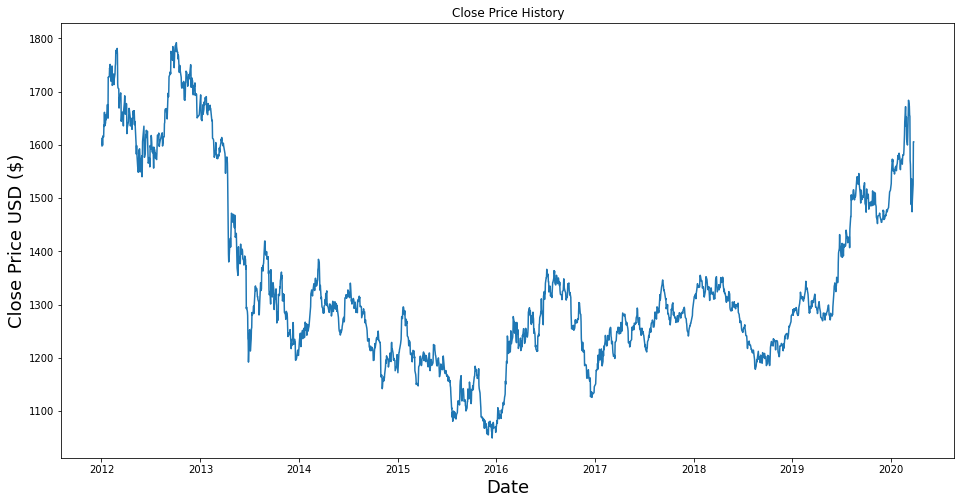

In [13]:
import os
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.graph_objects as go

# Get the quotes
df = web.DataReader('GOLDPMGBD228NLBM', 'fred', '2012-01-01', '2020-03-25')
# Show the data
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df.index)
df.set_axis(df['Date'], inplace=True)

# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['GOLDPMGBD228NLBM'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
close_data = df['GOLDPMGBD228NLBM'].values
# close_data = close_data.reshape((-1,1))

#Create the lists / X and y data set
dates = []
prices = []

#Create the independent data set 'X' as dates
for date in df['Date']:
  dates.append([date.timestamp() * 1000])
  
#Create the dependent data set 'y' as prices
for close_price in close_data:
  prices.append(float(close_price))

#See what days were recoreded in teh data set
print(dates)


[[1325548800000.0], [1325635200000.0], [1325721600000.0], [1325808000000.0], [1326067200000.0], [1326153600000.0], [1326240000000.0], [1326326400000.0], [1326412800000.0], [1326672000000.0], [1326758400000.0], [1326844800000.0], [1326931200000.0], [1327017600000.0], [1327276800000.0], [1327363200000.0], [1327449600000.0], [1327536000000.0], [1327622400000.0], [1327881600000.0], [1327968000000.0], [1328054400000.0], [1328140800000.0], [1328227200000.0], [1328486400000.0], [1328572800000.0], [1328659200000.0], [1328745600000.0], [1328832000000.0], [1329091200000.0], [1329177600000.0], [1329264000000.0], [1329350400000.0], [1329436800000.0], [1329696000000.0], [1329782400000.0], [1329868800000.0], [1329955200000.0], [1330041600000.0], [1330300800000.0], [1330387200000.0], [1330473600000.0], [1330560000000.0], [1330646400000.0], [1330905600000.0], [1330992000000.0], [1331078400000.0], [1331164800000.0], [1331251200000.0], [1331510400000.0], [1331596800000.0], [1331683200000.0], [1331769600

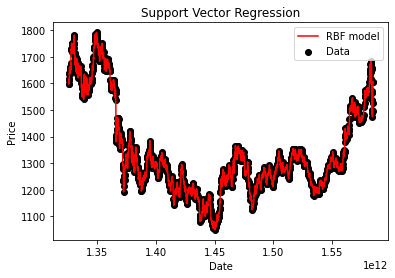

1341.3663508260358


In [15]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=.1)
# svr_lin = SVR(kernel='linear', C=1e3, gamma='auto')
# svr_poly = SVR(kernel='poly', C=1e3, gamma='auto', degree=3, epsilon=.1, coef0=1)

def predict_prices(dates, prices, x):
  # Train the models on the dates and prices
  # svr_lin.fit(dates, prices)
  # svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  
  # Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  # plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  # plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  # return all three model predictions
  return svr_rbf.predict(x)[0] # , svr_lin.predict(x)[0], svr_poly.predict(x)[0]

# Predict the price of Gold on next day
predicted_price = predict_prices(dates, prices, [[len(prices)+1]])

print(svr_rbf.predict([[len(prices)+1]])[0])

In [0]:
# Forecasting
def predict(forecast_dates, num_predictions, model):
    prediction_dates = dates
    prediction_list = close_data

    for i in range(1, num_predictions):
        prediction_dates.append([forecast_dates[i-1].timestamp() * 1000])
        x = [[len(prediction_list)+i]]
        out = model.predict(x)[0]
        prediction_list = np.append(prediction_list, out)
        svr_rbf.fit(prediction_dates, prediction_list)
    return prediction_list

def predict_dates(num_predictions):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_predictions+1).tolist()
    return prediction_dates

num_predictions = 60

forecast_dates = predict_dates(num_predictions)
forecasts = predict(forecast_dates, num_predictions, svr_rbf)

In [17]:
from datetime import datetime

# Plot the forecasts
trace1 = go.Scatter(
    x = [datetime.fromtimestamp(timestamp[0]/1000) for timestamp in dates],
    y = close_data,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = forecast_dates,
    y = forecasts,
    mode = 'lines',
    name = 'Forecasts'
)
layout = go.Layout(
    title = "Gold/USD",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()